In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
rng = np.random.default_rng()

# a)

In [2]:
n=500
pi_1 = 0.3
pi_2 = 0.7
n_1 = int(0.3 * n)
n_2 = int(0.7 * n)
X_1 = rng.normal(1,1, size=n_1)
X_2 = rng.normal(5,2, size=n_2)
X = np.append(X_1, X_2)
X.shape

(500,)

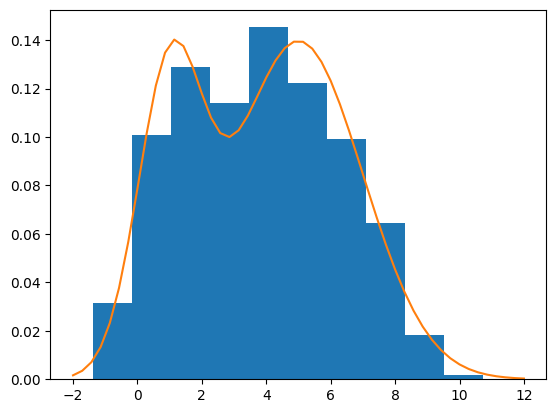

In [3]:
plt.hist(X, density=True)
r1 = norm(1,1)
r2 = norm(5,2)
x = np.linspace(-2, 12)
plt.plot(x, 0.3*r1.pdf(x)+0.7*r2.pdf(x))
plt.show()

# b)

$\sum_{i=1}^{n} \log(p(x_i,G_i=g_i|\theta)) = \sum_{i=1}^n (1-g_i)[\log(f_{N0}(x_i))+\log(\pi_0)]+g_i[\log(f_{N1}(x_i))+\log(\pi_1)]$

# C)

In [4]:
#gamma = (pi_2*r2.pdf(X))/(pi_1*r1.pdf(X)+pi_2*r2.pdf(X))

# D)

In [5]:
#new_mu1 = np.sum((1-gamma)*X)/np.sum(1-gamma)
#new_sigma1 = (np.sum((1-gamma)*(X-new_mu1)**2))/(np.sum(1-gamma))
#new_mu2 = np.sum(gamma*X)/np.sum(gamma)
#new_sigma2 = np.sum(gamma*(X-new_mu2)**2)/(np.sum(gamma))
#new_pi2 = np.sum(gamma)/len(gamma)
#new_pi1 = 1-new_pi2

# e)

In [6]:
mu1, mu2, sigma1, sigma2, pi1, pi2 = [*rng.normal(2,2,size=4)] + [0.5, 0.5]
new_mu1, new_mu2, new_sigma1, new_sigma2, new_pi1, new_pi2 = mu1, mu2, sigma1, sigma2, pi1, pi2

In [7]:
for i in range(100):
    r1 = norm(new_mu1, new_sigma1)
    r2 = norm(new_mu2, new_sigma2)
    gamma = (new_pi2*r2.pdf(X))/(new_pi1*r1.pdf(X)+new_pi2*r2.pdf(X))
    new_mu1 = np.sum((1-gamma)*X)/np.sum(1-gamma)
    new_sigma1 = np.sqrt((np.sum((1-gamma)*((X-new_mu1)**2)))/(np.sum(1-gamma)))
    new_mu2 = np.sum(gamma*X)/np.sum(gamma)
    new_sigma2 = np.sqrt(np.sum(gamma*((X-new_mu2)**2))/(np.sum(gamma)))
    new_pi2 = np.sum(gamma)/len(gamma)
    new_pi1 = 1-new_pi2
    print(new_mu1, new_mu2, new_sigma1, new_sigma2, new_pi1, new_pi2)
    if new_pi2 >=1 or new_pi1 >= 1:
        break

4.734007992542049 1.4498274682766426 2.154164751048456 1.2647038960116006 0.7123118142901832 0.28768818570981686
4.779370501346658 1.3378260978077599 2.0872906098700654 1.2440535045602712 0.7122854366325051 0.28771456336749496
4.819370984513501 1.2640255445300816 2.0393118916192385 1.2049786845784498 0.7102439282114631 0.2897560717885369
4.852250928223251 1.2132309760645643 2.00258934512893 1.168147284480748 0.7078711064444648 0.2921288935555352
4.877815906003052 1.1780332271248466 1.974409421299494 1.1394460945039186 0.7057589743729183 0.29424102562708165
4.896831808722077 1.1541617480304864 1.9534563203413833 1.1189380566704725 0.7040498535035753 0.29595014649642465
4.910560832519866 1.1384822907447318 1.938413408033181 1.105019422193678 0.7027175430924268 0.2972824569075732
4.920331870154586 1.1285404964463865 1.9278879089720613 1.0959193422742626 0.7016861681723379 0.29831383182766213
4.9272909633237 1.1224848526077391 1.920618684402419 1.090160268297939 0.700877554799521 0.2991224

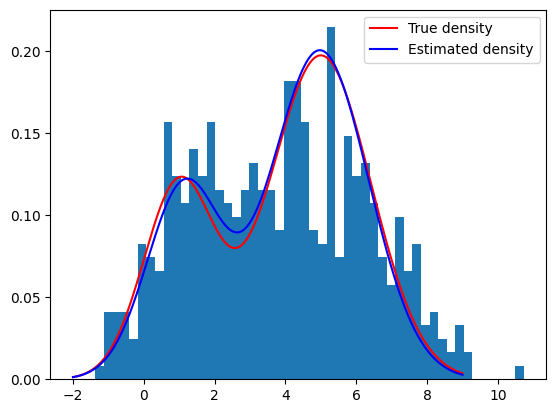

In [8]:
x_linspace = np.linspace(-2, 9, 1000)
def density(x, pi0, pi1, mu0, mu1, sigma_0, sigma_1):
    return (
        pi0 * np.exp(-0.5 * (x - mu0)**2 / sigma_0) / np.sqrt(2 * np.pi * sigma_0)
        + pi1 * np.exp(-0.5 * (x - mu1)**2 / sigma_1) / np.sqrt(2 * np.pi * sigma_1)
    )

true_density = density(x_linspace, 0.3, 0.7, 1, 5, 1, 2)
estimated_density = density(x_linspace, new_pi1, new_pi2, new_mu1, new_mu2, new_sigma1, new_sigma2)
plt.hist(X, bins=50, density=True)
plt.plot(x_linspace, true_density, color="red", label="True density")
plt.plot(x_linspace, estimated_density, color="blue", label="Estimated density")
plt.legend()
plt.show()